# Missing values filling

Small Notebook to test the best way to attribute PE values

In [15]:
###### Importing all used packages
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

from pandas import set_option
# set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

##### import stuff from scikit learn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, LeavePGroupsOut, LeaveOneGroupOut, cross_val_predict
from sklearn.metrics import confusion_matrix, make_scorer, f1_score, accuracy_score, recall_score, precision_score

filename = '../facies_vectors.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head()

(4149, 11)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [17]:
####### create X_train and y_train
X_train = df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']][df.PE.notnull()]
y_train = df['PE'][df.PE.notnull()]
groups_train = df['Well Name'][df.PE.notnull()]

X_fit = df[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'NM_M', 'RELPOS']][df.PE.isnull()]

In [12]:
Cl = RandomForestRegressor(n_estimators=100)

cv=LeavePGroupsOut(2).split(X_train, y_train, groups_train)
validated = cross_val_score(Cl, X_train, y_train, cv=cv, n_jobs=-1)
    
scores = np.array(validated)

print (validated)

[ 0.72964852  0.61087697  0.5795665   0.68766247  0.41367697  0.6171466
  0.56019926  0.57166217  0.58202965  0.66579392  0.84417507  0.480776
  0.53216201  0.32710497  0.56032068  0.69863378  0.4509542   0.36681225
  0.44699504  0.7315051   0.4616152   0.29758341  0.69708899  0.50967597
  0.41847744  0.75525241  0.30985659  0.52724091]


In [18]:
Cl.fit(X_train, y_train)
y_predict = Cl.predict(X_fit)

In [21]:
df['PE'][df.PE.isnull()] = y_predict

In [23]:
training_data = df

###### Import packages needed for the make_vars functions
import Feature_Engineering as FE

##### cD From wavelet db1
dwt_db1_cD_df = FE.make_dwt_vars_cD(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db1')

##### cA From wavelet db1
dwt_db1_cA_df = FE.make_dwt_vars_cA(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db1')

##### cD From wavelet db3
dwt_db3_cD_df = FE.make_dwt_vars_cD(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db3')

##### cA From wavelet db3
dwt_db3_cA_df = FE.make_dwt_vars_cA(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                       levels=[1, 2, 3, 4], wavelet='db3')

##### From entropy
entropy_df = FE.make_entropy_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                               l_foots=[2, 3, 4, 5, 7, 10])

###### From gradient
gradient_df = FE.make_gradient_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                 dx_list=[2, 3, 4, 5, 6, 10, 20])

##### From rolling average
moving_av_df = FE.make_moving_av_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                   windows=[1, 2, 5, 10, 20])

##### From rolling standard deviation
moving_std_df = FE.make_moving_std_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3 , 4, 5, 7, 10, 15, 20])

##### From rolling max
moving_max_df = FE.make_moving_max_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3, 4, 5, 7, 10, 15, 20])

##### From rolling min
moving_min_df = FE.make_moving_min_vars(wells_df=training_data, logs=['GR', 'ILD_log10', 'DeltaPHI', 'PE', 'PHIND'],
                                     windows=[3 , 4, 5, 7, 10, 15, 20])

###### From rolling NM/M ratio
rolling_marine_ratio_df = FE.make_rolling_marine_ratio_vars(wells_df=training_data, windows=[5, 10, 15, 20, 30, 50, 75, 100, 200])

###### From distance to NM and M, up and down
dist_M_up_df = FE.make_distance_to_M_up_vars(wells_df=training_data)
dist_M_down_df = FE.make_distance_to_M_down_vars(wells_df=training_data)
dist_NM_up_df = FE.make_distance_to_NM_up_vars(wells_df=training_data)
dist_NM_down_df = FE.make_distance_to_NM_down_vars(wells_df=training_data)

In [24]:
list_df_var = [dwt_db1_cD_df, dwt_db1_cA_df, dwt_db3_cD_df, dwt_db3_cA_df,
               entropy_df, gradient_df, moving_av_df, moving_std_df, moving_max_df, moving_min_df,
              rolling_marine_ratio_df, dist_M_up_df, dist_M_down_df, dist_NM_up_df, dist_NM_down_df]
combined_df = training_data
for var_df in list_df_var:
    temp_df = var_df
    combined_df = pd.concat([combined_df,temp_df],axis=1)
combined_df.replace(to_replace=np.nan, value='-1', inplace=True)
print (combined_df.shape)
combined_df.head(5)

(4149, 299)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,...,Marine_ratio_20_centered,Marine_ratio_30_centered,Marine_ratio_50_centered,Marine_ratio_75_centered,Marine_ratio_100_centered,Marine_ratio_200_centered,dist_M_up,dist_M_down,dist_NM_up,dist_NM_down
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,...,1.0,1.0,1.0,1.0,1.140000,1.510000,-1.0,21.5,0.0,0.0
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,...,1.0,1.0,1.0,1.0,1.156863,1.504950,-1.0,21.0,0.0,0.0
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,...,1.0,1.0,1.0,1.0,1.173077,1.500000,-1.0,20.5,0.0,0.0
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,...,1.0,1.0,1.0,1.0,1.188679,1.495146,-1.0,20.0,0.0,0.0
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,...,1.0,1.0,1.0,1.0,1.203704,1.490385,-1.0,19.5,0.0,0.0


In [25]:
###### create predictor and target arrays
X = combined_df.iloc[:, 4:]
y = combined_df['Facies']
groups = combined_df['Well Name']

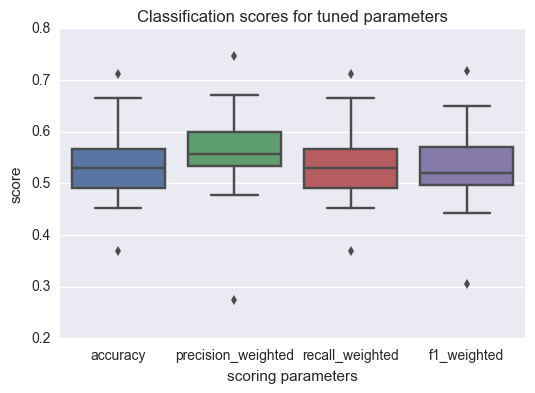

In [26]:
######### Estimation of validation scores from this tuning:
scoring_param = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted' ]
scores = []

Cl = RandomForestClassifier(n_estimators=100, max_features=0.1, min_samples_leaf=25,
                            min_samples_split=50, class_weight='balanced', random_state=42, n_jobs=-1)

for scoring in scoring_param:
    cv=LeavePGroupsOut(2).split(X, y, groups)
    validated = cross_val_score(Cl, X, y, scoring=scoring, cv=cv, n_jobs=-1)
    scores.append(validated)
    
scores = np.array(scores)
scores = np.swapaxes(scores, 0, 1)
scores = pd.DataFrame(data=scores, columns=scoring_param)
    
sns.boxplot(data=scores)

plt.xlabel('scoring parameters')
plt.ylabel('score')
plt.title('Classification scores for tuned parameters')
plt.show()